In [6]:
import sys, os
os.environ['WANDB_NOTEBOOK_NAME'] = 'rbig_v2'
sys.path.append("/home/emmanuel/code/destructive-deep-learning")
# sys.path.append("/home/emmanuel/notebooks/jaxflows/scripts")

# from data import get_toy_data
# from visualize import plot_joint
from ddl.univariate import HistogramUnivariateDensity
from ddl.independent import (
    IndependentInverseCdf,
    IndependentDensity,
    IndependentDestructor,
)
from ddl.linear import LinearProjector
from ddl.base import CompositeDestructor
from ddl.deep import DeepDestructor, DeepDestructorCV
from sklearn.decomposition import PCA
import tqdm
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_context(context="poster", font_scale=0.7)
# sns.set_style(style="white")

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# config parameters
n_samples = 10_000
dataset = "classic"
bins = "sqrt"  # bin estimation (uses automatric method)
bounds = 0.1  # percentage extension of the support
alpha = 1e-10  # regularization parameter for hist


### Data

In [8]:
def get_toy_data(n_samples=1000, seed=123):
    rng = np.random.RandomState(seed=seed)

    x = np.abs(2 * rng.randn(n_samples, 1))
    y = np.sin(x) + 0.25 * rng.randn(n_samples, 1)
    data = np.hstack((x, y))

    return data


## Plots

In [9]:
def plot_hist(
    data: np.ndarray, color: str = "red", title: str = "", bins=100):

    fig, ax = plt.subplots()
    ax.hist(x=data[:, 0], bins=bins, color=color, density=True)
    ax.set_xlabel(r"$\mathcal{X}$", fontsize=30)
    plt.suptitle(title)
    plt.tight_layout()
    fig.savefig(transparent=True,)
    plt.show()

/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 432x288 with 0 Axes>

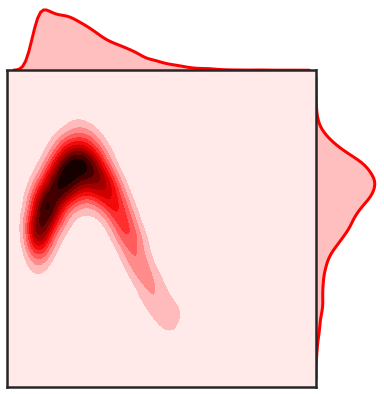

In [11]:
data = get_toy_data(n_samples=n_samples)


with sns.axes_style('white'):
    plt.figure()
    pts = sns.jointplot(
        x=data[:, 0], y=data[:, 1], 
        kind="kde", 
        color="red", 
        bw_adjust=0.15,
#         joint_kwgs={"fill":True}, 
        space=0.0
    #     fill=True
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.suptitle("")
    pts.ax_joint.set_xticks([])
    pts.ax_joint.set_yticks([])
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
#     plt.tight_layout()
    plt.savefig("./figures/joint_x.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
    plt.show()

## RBIG Block

In [12]:
from ddl.base import CompositeDestructor
# ==================================
# Step I - Marginal Uniformization
# ==================================
# Choose the Histogram estimator that converts the data X to uniform U(0,1)
univariate_estimator = HistogramUnivariateDensity(
    bounds=0.1, bins="sqrt", alpha=1e-5
)

# Marginally uses histogram estimator
marginal_uniformization = IndependentDensity(
    univariate_estimators=univariate_estimator
)

# Creates "Destructor" D_theta_1
uniform_density = IndependentDestructor(marginal_uniformization)

# ===================================
# Step II - Marginal Gaussianization
# ===================================

# Choose destructor D_theta_2 that converts data
marginal_gaussianization = IndependentInverseCdf()

# ======================================
# Step III - Rotation
# ======================================


### Random Rotations

In [16]:

# Choose a linear projection to rotate the features (PCA) "D_theta_3"
rotation = LinearProjector(linear_estimator=PCA(svd_solver='randomized', random_state=123))

rot_block = CompositeDestructor([
    rotation
])

In [18]:
X = rot_block.fit_transform(data)




In [19]:
plt.figure()
pts = sns.jointplot(
    x=X[:, 0], y=X[:, 1], 
    kind="kde", 
    color="red", 
    bw_adjust=0.15,
#         joint_kwgs={"fill":True}, 
    space=0.0
#     fill=True
)
plt.xlabel("")
plt.ylabel("")
plt.suptitle("")
pts.ax_joint.set_xticks([])
pts.ax_joint.set_yticks([])
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)
#     plt.tight_layout()
plt.savefig(f"./figures/joint_x_rot.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.close()

/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 432x288 with 0 Axes>

/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not us

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

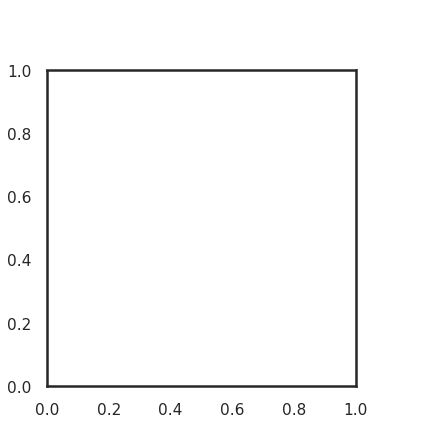

In [9]:
n_layers = 50

X = data.copy()
for i in range(n_layers):
    
    
    with sns.axes_style('white'):
        plt.figure()
        pts = sns.jointplot(
            x=X[:, 0], y=X[:, 1], 
            kind="kde", 
            color="red", 
            bw_adjust=0.15,
    #         joint_kwgs={"fill":True}, 
            space=0.0
        #     fill=True
        )
        plt.xlabel("")
        plt.ylabel("")
        plt.suptitle("")
        pts.ax_joint.set_xticks([])
        pts.ax_joint.set_yticks([])
        plt.tick_params(
            axis='both',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            left=False,
            top=False,         # ticks along the top edge are off
            labelbottom=False,
            labelleft=False)
    #     plt.tight_layout()
        plt.savefig(f"./figures/joint_x_l{i+1}.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
        plt.close()

In [10]:
X_u = uniform_density.fit_transform(data[:, 0][:, np.newaxis])

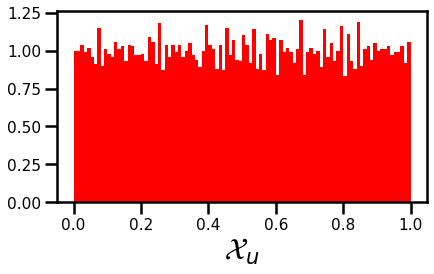

In [11]:
fig, ax = plt.subplots()
ax.hist(x=X_u, bins=100, color="red", density=True)
ax.set_xlabel(r"$\mathcal{X}_u$", fontsize=30)
plt.suptitle("")
plt.tight_layout()
fig.savefig("./figures/hist_x_u.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

### Inverse CDF Transformation

In [12]:
# ===================================
# Step II - Marginal Gaussianization
# ===================================

# Choose destructor D_theta_2 that converts data
marginal_gaussianization = IndependentInverseCdf()


In [13]:
X_g = marginal_gaussianization.fit_transform(X_u)

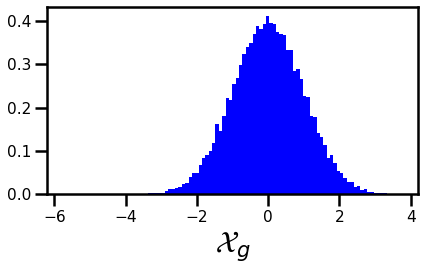

In [14]:
fig, ax = plt.subplots()
ax.hist(x=X_g, bins=100, color="blue", density=True)
ax.set_xlabel(r"$\mathcal{X}_g$", fontsize=30)
plt.suptitle("")
plt.tight_layout()
fig.savefig("./figures/hist_x_g.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
plt.show()

## 2D Example


/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 432x288 with 0 Axes>

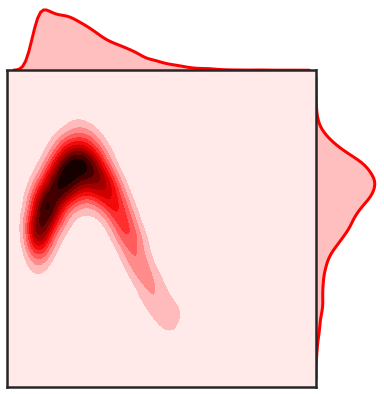

In [97]:
with sns.axes_style('white'):
    plt.figure()
    pts = sns.jointplot(
        x=data[:, 0], y=data[:, 1], 
        kind="kde", 
        color="red", 
        bw_adjust=0.15,
#         joint_kwgs={"fill":True}, 
        space=0.0
    #     fill=True
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.suptitle("")
    pts.ax_joint.set_xticks([])
    pts.ax_joint.set_yticks([])
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
#     plt.tight_layout()
    plt.savefig("./figures/joint_x.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
    plt.show()

### Marginal Uniformization

<Figure size 432x288 with 0 Axes>

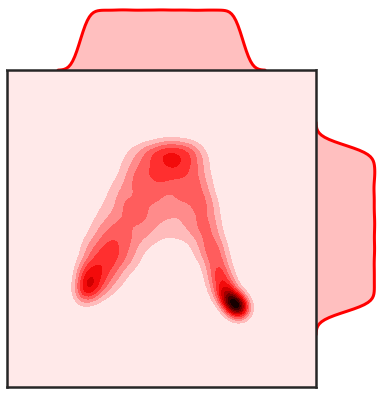

In [15]:
X_u = uniform_density.fit_transform(data)

with sns.axes_style('white'):
    plt.figure()
    pts = sns.jointplot(
        x=X_u[:, 0], y=X_u[:, 1], 
        kind="kde", 
        color="red", 
        bw=0.15,
#         joint_kwgs={"fill":True}, 
        space=0.0
    #     fill=True
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.suptitle("")
    pts.ax_joint.set_xticks([])
    pts.ax_joint.set_yticks([])
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
#     plt.tight_layout()
    plt.savefig("./figures/joint_x_u.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
    plt.show()

#### Marginal Gaussianization

/home/emmanuel/.conda/envs/pyddd/lib/python3.8/site-packages/seaborn/distributions.py:434: UserWarning: The following kwargs were not used by contour: 'bw_adjust'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 432x288 with 0 Axes>

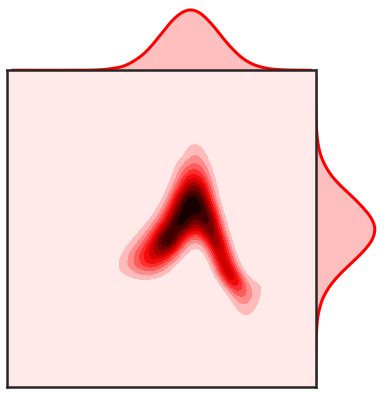

In [16]:



X_g = marginal_gaussianization.fit_transform(X_u)

with sns.axes_style('white'):
    plt.figure()
    pts = sns.jointplot(
        x=X_g[:, 0], y=X_g[:, 1], 
        kind="kde", 
        color="red", 
        bw_adjust=0.15,
#         joint_kwgs={"fill":True}, 
        space=0.0
    #     fill=True
    )
    plt.xlabel("")
    plt.ylabel("")
    plt.suptitle("")
    pts.ax_joint.set_xticks([])
    pts.ax_joint.set_yticks([])
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False)
#     plt.tight_layout()
    plt.savefig("./figures/joint_x_g.png",transparent=True, dpi=100, bbox_inches="tight", facecolor=None)
    plt.show()

#### Rotation

## Deep Destructor

This is where we put everything in one block and add multiple layers.

#### 1. Marginal Uniformization

In [46]:
%%time
from ddl.deep import DeepDestructorStop
# ==================================
# Step I - Marginal Uniformization
# ==================================
# Choose the Histogram estimator that converts the data X to uniform U(0,1)
univariate_estimator = HistogramUnivariateDensity(
    bounds=0.1, bins='sqrt', alpha=1e-1
)

# Marginally uses histogram estimator
marginal_uniformization = IndependentDensity(
    univariate_estimators=univariate_estimator
)

# Creates "Destructor" D_theta_1
uniform_density = IndependentDestructor(marginal_uniformization)

# ===================================
# Step II - Marginal Gaussianization
# ===================================

# Choose destructor D_theta_2 that converts data
marginal_gaussianization = IndependentInverseCdf()

# ======================================
# Step III - Rotation
# ======================================

# Choose a linear projection to rotate the features (PCA) "D_theta_3"
rotation = LinearProjector(linear_estimator=PCA(svd_solver='randomized', random_state=123))

# ======================================
# All Steps - Deep Density Destructor
# ======================================
# rbig_block = CompositeDestructor(
#     destructors=
# )
rbig_flow = DeepDestructorStop(
    canonical_destructor=[uniform_density, marginal_gaussianization, rotation],
    base_dist="gaussian", 
    tol_layers=15,
    threshhold=0.25
)



CPU times: user 80 µs, sys: 0 ns, total: 80 µs
Wall time: 83.4 µs


In [47]:
from ddl.rbig import get_rbig_model

In [195]:
bins = 'sqrt'
bounds = 0.2
alpha = 10.
random_state = 123
tol_layers = 20
threshhold = 0.25
rotation = "pca"

rbig_flow = get_rbig_model(
    bins=bins, 
    bounds=bounds, 
    alpha=alpha, 
    random_state=random_state,
    rotation=rotation,
    tol_layers=tol_layers, 
    threshhold=threshhold
)

In [196]:
%%time

data = get_toy_data(n_samples=10_000, seed=123)
# Fit and transform data G_z ----> R (G_z)
G_approx = rbig_flow.fit_transform(data)

CPU times: user 13.9 s, sys: 1.66 s, total: 15.5 s
Wall time: 578 ms


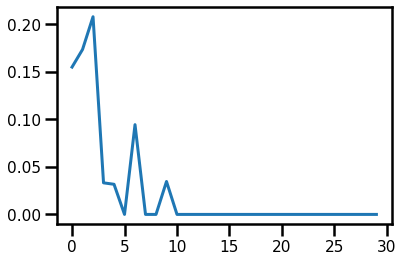

In [197]:
plt.plot(rbig_flow.loss)

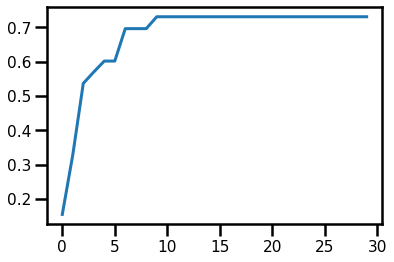

In [198]:
plt.plot(np.cumsum(rbig_flow.loss))

<Figure size 432x288 with 0 Axes>

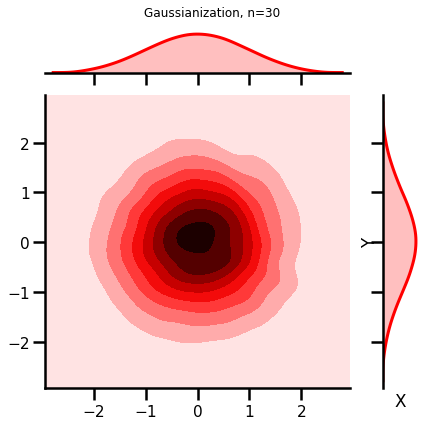

In [199]:
# Data Together
plot_joint(G_approx, "red", title=f"Gaussianization, n={rbig_flow.n_layers}")

### Inverse Transformation

In [200]:
# inverse transformation
data_approx = rbig_flow.inverse_transform(G_approx) 

In [201]:
# check that the inverse is almost equal
np.testing.assert_array_almost_equal(data_approx, data, decimal=5)

# calculate the residuals
residuals = np.sum((data_approx - data)**2)
print(f"Residuals: {residuals:.2e}")

Residuals: 1.98e-25


<Figure size 432x288 with 0 Axes>

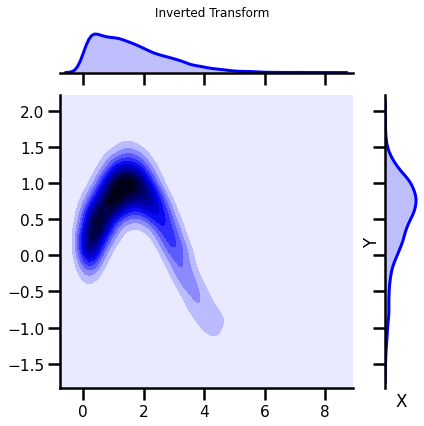

In [202]:
plot_joint(data_approx, "blue", title=f"Inverted Transform")

### Sampling

Now that we have a sufficient amount of layers, we can also sample from our base distribution and produce samples in our data distribution.

In [203]:
%%time

# Data Together
data_approx = rbig_flow.sample(10_000, random_state=123)

CPU times: user 137 ms, sys: 2.02 ms, total: 139 ms
Wall time: 138 ms


<Figure size 432x288 with 0 Axes>

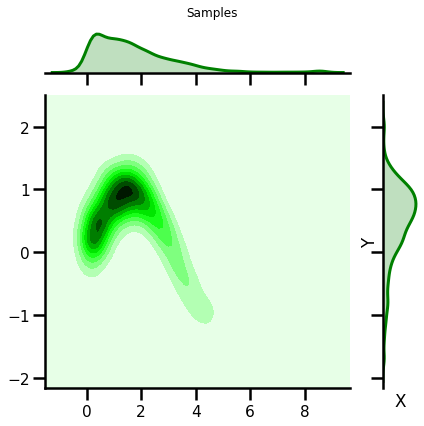

In [204]:
plot_joint(data_approx, "green", title=f"Samples")

## Probabilities

In [205]:
X_log_prob = rbig_flow.score_samples(data)

In [206]:
def plot_joint_prob(
    data: np.ndarray, probs: np.ndarray, cmap="Reds", title="", logger=None
):

    fig, ax = plt.subplots()
    h = ax.scatter(data[:, 0], data[:, 1], s=1, c=probs, cmap=cmap)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar(h,)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

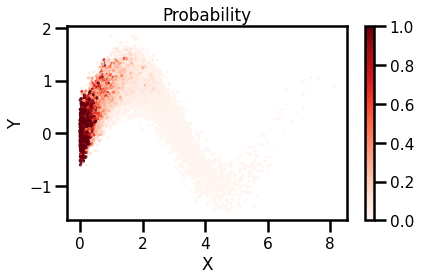

In [207]:
# convert to probability
X_prob = np.exp(X_log_prob)

# clip some extreme values
X_prob = np.clip(X_prob, 0.0, 1.0)

# plot
plot_joint_prob(data, X_prob, title="Probability")

### Negative Log-Likelihood

In [208]:
nll = rbig_flow.score(data)
print(f"Negative Log-Likelihood Score: {nll:.4f}")

Negative Log-Likelihood Score: -2.8499


### Total Correlation

In [209]:
total_corr = rbig_flow.total_corr(base=2)
print(f"Total Correlation: {total_corr:.4f}")

Total Correlation: 0.5062
